In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
%matplotlib widget

In [2]:
path = 'output' # data folder
data_files = sorted(glob.glob(os.path.join(path, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))

In [3]:
data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
data.shape

(182272, 2)

(1000.0, 3000.0)

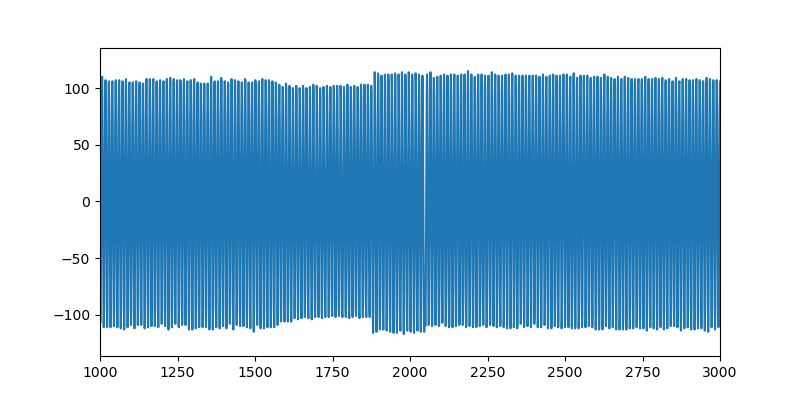

In [4]:
plt.figure(figsize=(8,4))
plt.plot(data[:,0])
plt.xlim(1000, 3000)

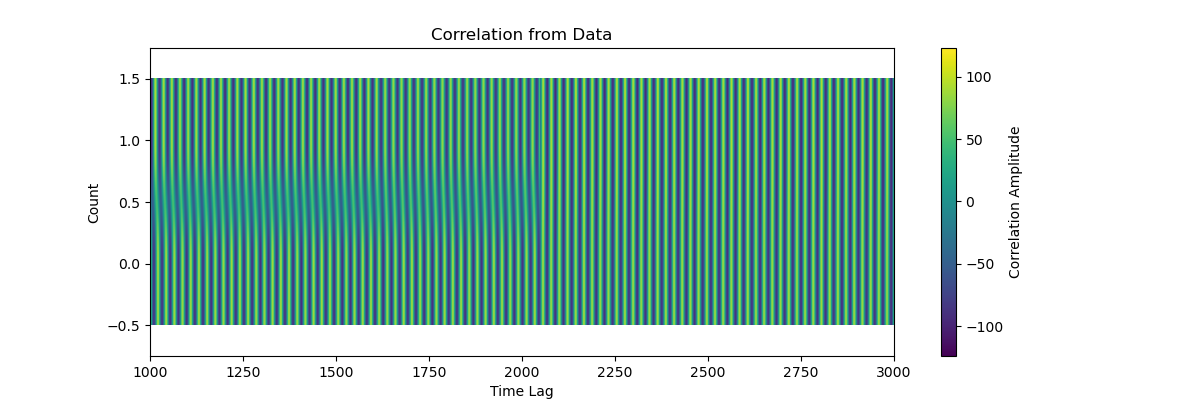

In [5]:
# creates list to hold data for correlations
all_correlations = []

# loads and appends data to list
for file in data_files:
    data = np.load(file)['data']
    all_correlations.append(data)

# converts list to a single numpy array and concatenates 
all_correlations = np.concatenate(all_correlations, axis=0).view('int8')

# reshaping for imshow
num_samples = all_correlations.shape[0]
correlation = all_correlations.reshape(-1, num_samples)

# plotting
plt.figure(figsize=(12, 4))
plt.imshow(correlation, aspect='auto', cmap='viridis', origin='lower')

plt.title('Correlation from Data')
plt.xlabel('Time Lag')
plt.ylabel('Count')
plt.xlim(1000, 3000)
plt.ylim(-0.75, 1.75)
plt.colorbar(label='Correlation Amplitude')

plt.show()
